# Major Project Exam: Exploratory Data Analysis (EDA) and Machine Learning Integration

### Problem statement:
Perform a comprehensive analysis on the given dataset using Python, incorporating exploratory data analysis (EDA) and machine learning techniques. Your task is to preprocess the data, engineer features, select and train models, and evaluate their performance.

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations.


### Section 1: Understanding the Dataset

In [398]:
import pandas as pd
import numpy as np


#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [399]:
df=pd.read_csv('car_price_dataset.csv')

#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [400]:
df.shape

(15411, 14)

#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [401]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [402]:
df.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


### Section 2: Initial Data Examination

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [404]:
# Observation:

# the dataset has 15,411 rows
# The index ranges from 0 to 15410
# There are 14 column
# The dataset contains objects, float64, int64 datatypes
# The dataset has used 1.5+ megabytes of memory.
# The target column is "Selling_price"

#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [405]:
### Checking data type of each column
print(df.dtypes)
print(df.columns)

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object
Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')


In [406]:
# checking number of columns
print(len(df.columns))

14


In [407]:
# Drop the columns that do not influence the target and are making the dataset noisy

df.drop(['Unnamed: 0', 'car_name', 'seller_type'  ], axis=1,inplace=True)

In [408]:
## Converting object columns to category columns

# finding object data types
category_cols = df.select_dtypes(include=['object']).columns

# Converting object to category data types
df[category_cols] = df[category_cols].astype('category')

# Displaying converted data types
print(df.dtypes)

brand                category
model                category
vehicle_age             int64
km_driven               int64
fuel_type            category
transmission_type    category
mileage               float64
engine                  int64
max_power             float64
seats                   int64
selling_price           int64
dtype: object


In [409]:
## Observation:

# initial datatypes are object, integer and float
# object data types have been converted to category to save memory
# Column unnamed:0, car_name and seller_type dropped to keep data less noisy

#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [410]:
# Generating summary statistics
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [411]:
# Replacing 0 values with mean or mode
df["vehicle_age"] = df["vehicle_age"].replace(0, df["vehicle_age"].mean())
df["seats"] = df["seats"].replace(0, round(df["seats"].mean()))
df["brand"] = df["brand"].replace(0, df["brand"].mode()[0])
df["model"] = df["model"].replace(0, df["model"].mode()[0])
df["fuel_type"] = df["fuel_type"].replace(0, df["fuel_type"].mode()[0])

In [412]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.038296,5.561648e+04,19.701151,1486.057751,100.588254,5.326131,7.749711e+05
std,3.011328,5.161855e+04,4.171265,521.106696,42.972979,0.805355,8.941284e+05
min,1.000000,1.000000e+02,4.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [413]:
# Defining numerical columns and computing basic statistics

numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print("nSummary statistics for numerical features:")
print(numerical_columns.describe())

nSummary statistics for numerical features:
        vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.038296  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.011328  5.161855e+04      4.171265    521.106696     42.972979   
min        1.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.326131   7.749711e+05  
std        0.805355   8.941284e+05  
min        2.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   

#### 2.4 Provide detailed comments that explain your understanding of the data.

In [414]:
#Observation:

# Selling price is a target or dependent variable
# Other columns (vehicle_age, km_driven, mileage, engine, max_power, seats) are independent variables used to hustify the price of the car
# vehicle_age: the average is 6 years, the newest is 0 and oldest is 29 years
# km_driven: the average is  5.5616, the range of km driven is is 3.0000-7.0000,
# The minimum km driven is 1.0000 and maximum is 3.8000-which might be an error)
# mileage average is 19.701151, minimum 4.0000 and maximum 33.5400
# engine avarege is 1486.0577 with a minimum of 793.0000 and maximum of 6592.000
# max_power-avarage is 100.5882, minimum (38.4000), maximum (626.0000)
# seats-average is 5, minimum 0.0000, maximum 9.0000. 0 seats could be an error

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [415]:
# identifying missing values to get a summary of null values in each column
df.isnull().sum()

,0
brand,0
model,0
vehicle_age,0
km_driven,0
fuel_type,0
transmission_type,0
mileage,0
engine,0
max_power,0
seats,0


In [416]:
# Checking if the dataset has missing NAN values
df.isna()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15406,False,False,False,False,False,False,False,False,False,False,False
15407,False,False,False,False,False,False,False,False,False,False,False
15408,False,False,False,False,False,False,False,False,False,False,False
15409,False,False,False,False,False,False,False,False,False,False,False


In [417]:
## Observation:
# no missing or NAN values identified using df.isnull().sum() and df.isna()
# However,if there were NAN values, numeric values will be replaced with mean or median;
#categorical values will be replaced with mode

#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [418]:
# Check duplicates
df.duplicated().sum()

np.int64(182)

In [419]:
# Confirm the presence of duplicates
print(df.duplicated().any())

True


In [420]:
# Filter the rows where the duplicated condition is True using index
print(df[df.duplicated()])

            brand        model  vehicle_age  km_driven fuel_type  \
197         Honda         City          8.0      70000    Petrol   
360        Maruti       Baleno          2.0       5000    Petrol   
1056       Maruti       Baleno          4.0      25000    Petrol   
1353       Maruti  Swift Dzire          4.0      50000    Diesel   
1429       Maruti      Wagon R         13.0     100000    Petrol   
...           ...          ...          ...        ...       ...   
15229      Maruti        Swift          8.0      80000    Diesel   
15324      Maruti      Wagon R          6.0      50000       CNG   
15367        Tata        Tiago          4.0      30000    Petrol   
15378     Hyundai        Grand          6.0      30000    Petrol   
15392  Land Rover        Rover          5.0     128000    Diesel   

      transmission_type  mileage  engine  max_power  seats  selling_price  
197              Manual    16.80    1497     116.30      5         545000  
360           Automatic    21.4

In [421]:
## Removing duplicates,keeping the last occurance assuming that it is the latest

df = df.drop_duplicates( keep='last')

In [422]:
df.shape

(15229, 11)

In [423]:
### Reseting the index

df.reset_index(inplace=True)
df.tail()

,index,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15224,15406,Hyundai,i10,9.0,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15225,15407,Maruti,Ertiga,2.0,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15226,15408,Skoda,Rapid,6.0,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15227,15409,Mahindra,XUV500,5.0,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000
15228,15410,Honda,City,2.0,13000,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [424]:
### droping the index column automatically when reseting the index
df.drop(['index'], axis=1,inplace=True)

df.tail()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15224,Hyundai,i10,9.0,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15225,Maruti,Ertiga,2.0,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15226,Skoda,Rapid,6.0,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15227,Mahindra,XUV500,5.0,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000
15228,Honda,City,2.0,13000,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [425]:
### Checking for duplicated after removing the duplicates and reseting the index
df.duplicated().sum()

np.int64(0)

In [426]:
### checking the shape of the dataframe after the index reset
df.shape

(15229, 11)

In [427]:
### Observation:

# 182 duplicates identified
# Duplicates were dropped but kept the last version assuming it is the latest
# The dataframe index is reseted, df.tail displays an 'index' column

#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.

In [428]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Number of outliers in vehicle_age: 154
Number of outliers in km_driven: 464
Number of outliers in mileage: 87
Number of outliers in engine: 2102
Number of outliers in max_power: 853
Number of outliers in seats: 2474
Number of outliers in selling_price: 1371

Original rows: 15229
Rows after removing outliers: 10947


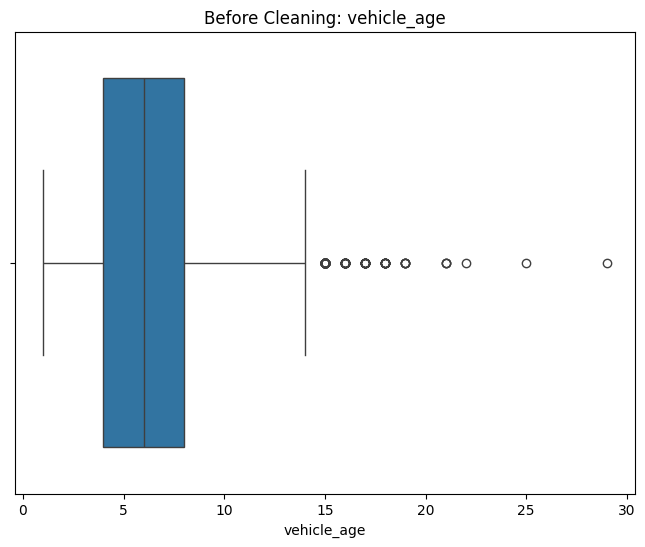

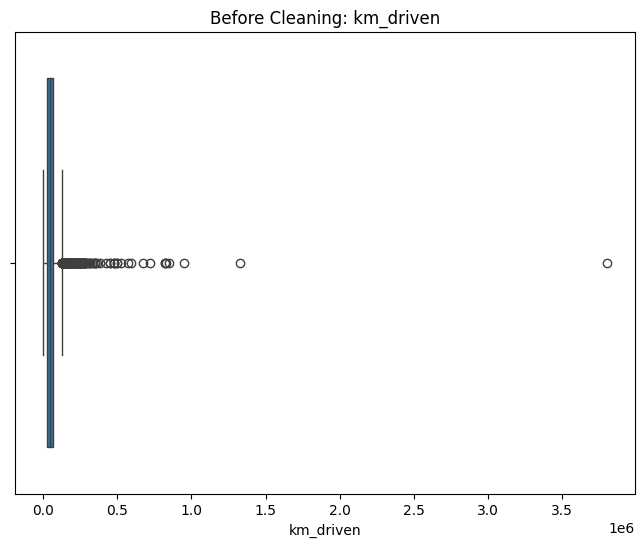

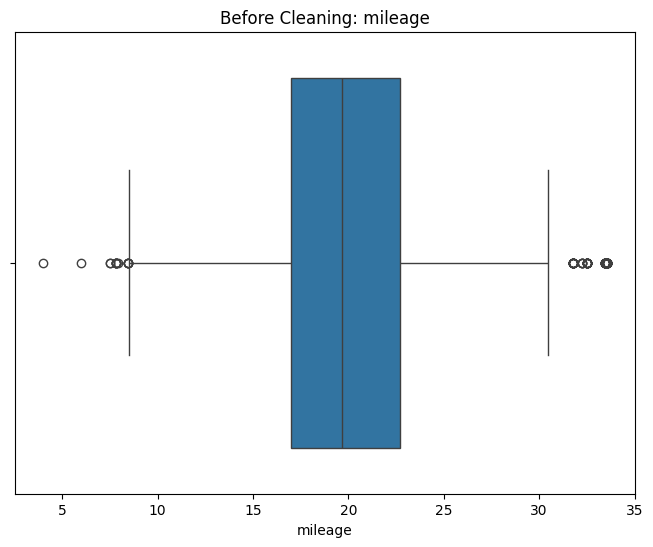

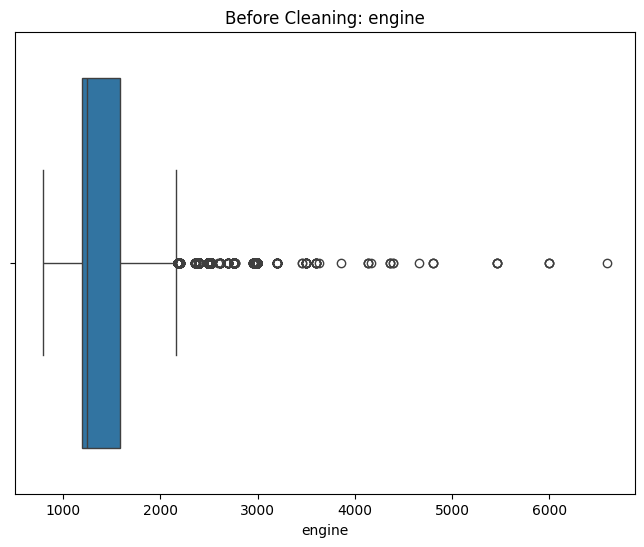

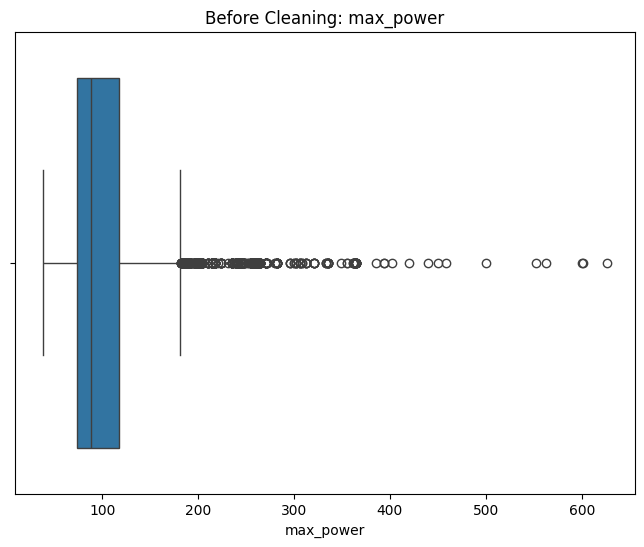

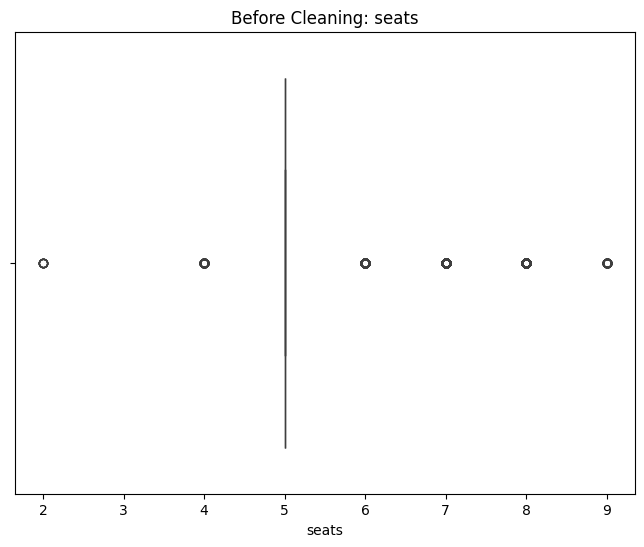

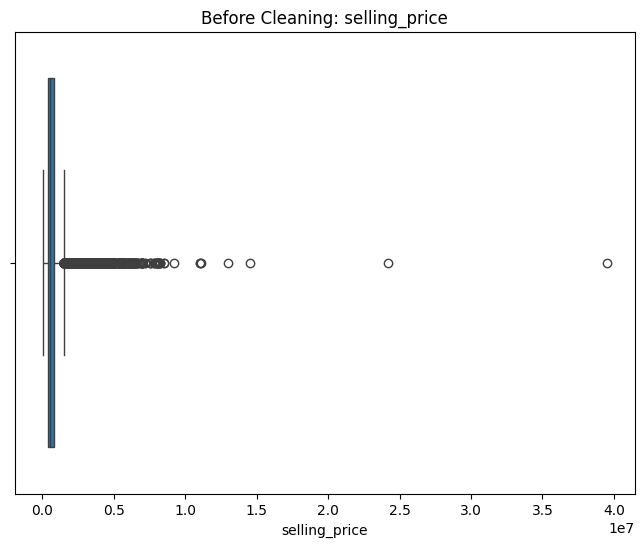

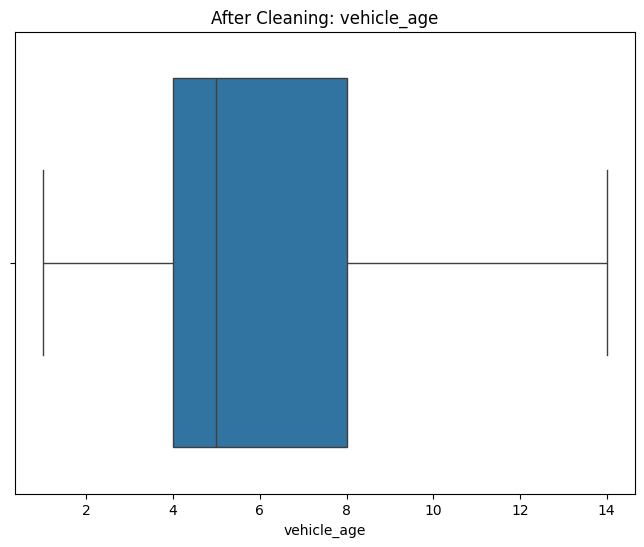

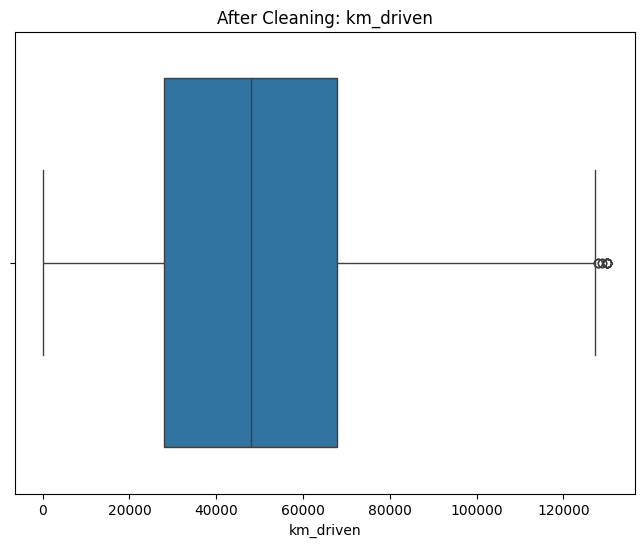

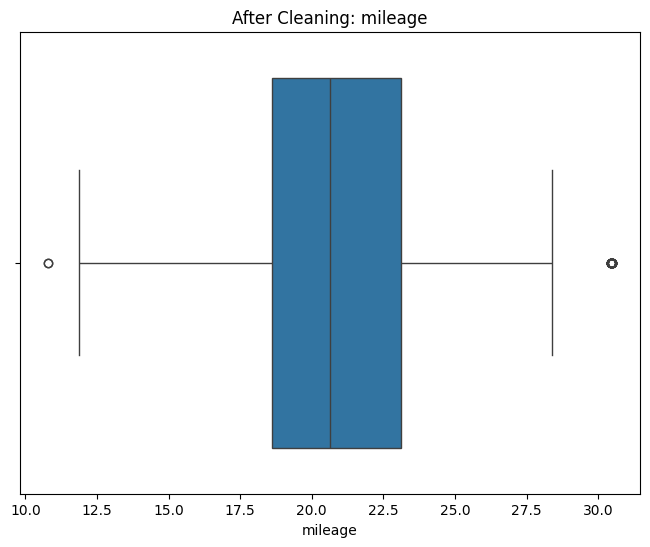

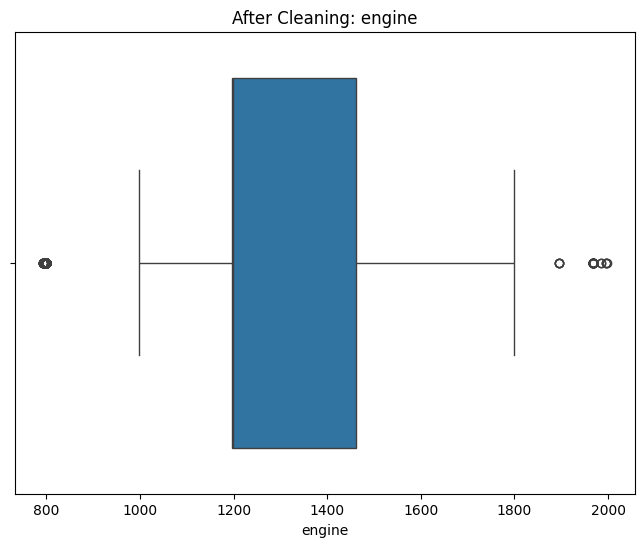

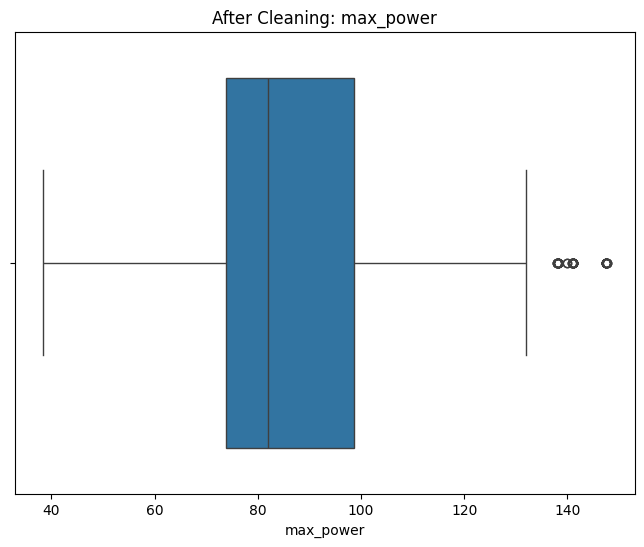

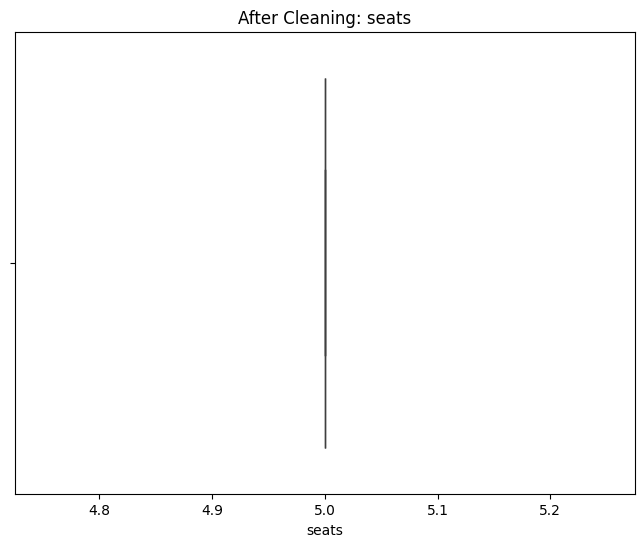

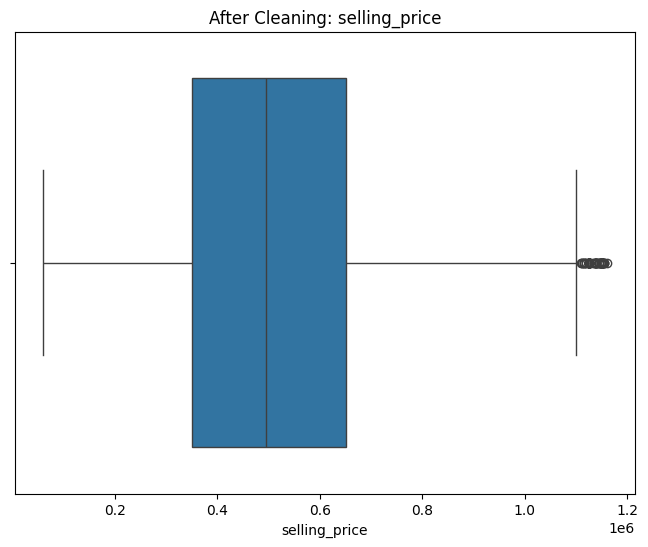

In [429]:
### Checking outliers

#defining numerical columns
numeric_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
outliers = []

# Outliers count dictionary
outlier_counts = {}

# Loop through each numeric column
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count rows that are outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

# Outlier counts per column
for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")

# Removing outliers

    df_clean = df.copy()

for column in numeric_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering outliers
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

print(f"\nOriginal rows: {df.shape[0]}")
print(f"Rows after removing outliers: {df_clean.shape[0]}")

# Check outliers graphically
def plot_boxplots(data, columns, title):
    for column in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        plt.title(f"{title}: {column}")
        plt.show()

# Boxplots before removing outliers
plot_boxplots(df, numeric_columns, "Before Cleaning")

# Boxplots after removing oiutliers
plot_boxplots(df_clean, numeric_columns, "After Cleaning")

In [430]:
### Checking outliers using a non-graphical method

df_clean= df.copy()

# count number outliers- after removing outliers
for column in numeric_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

 # Filtering outliers
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# check result
print(f"\nOriginal rows: {df.shape[0]}")
print(f"Cleaned rows: {df_clean.shape[0]}")


Original rows: 15229
Cleaned rows: 10947


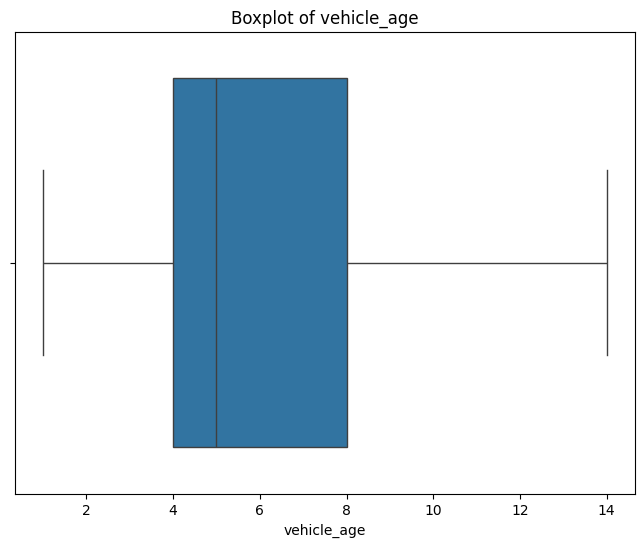

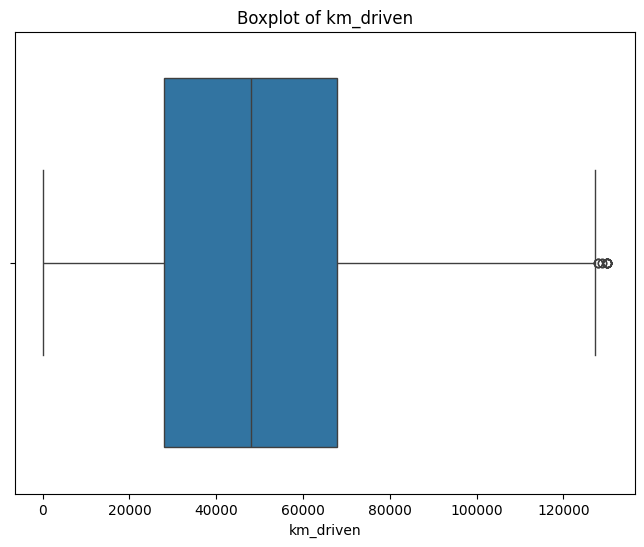

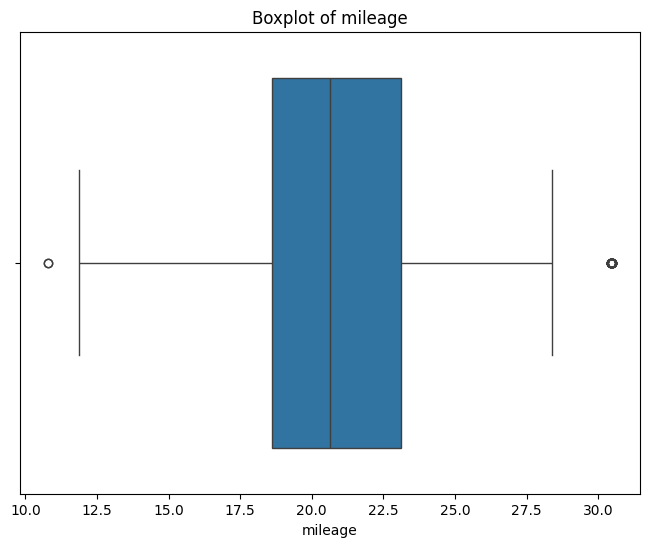

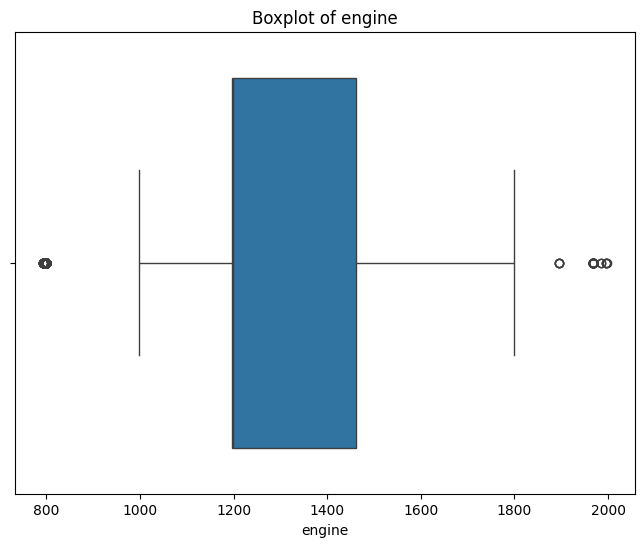

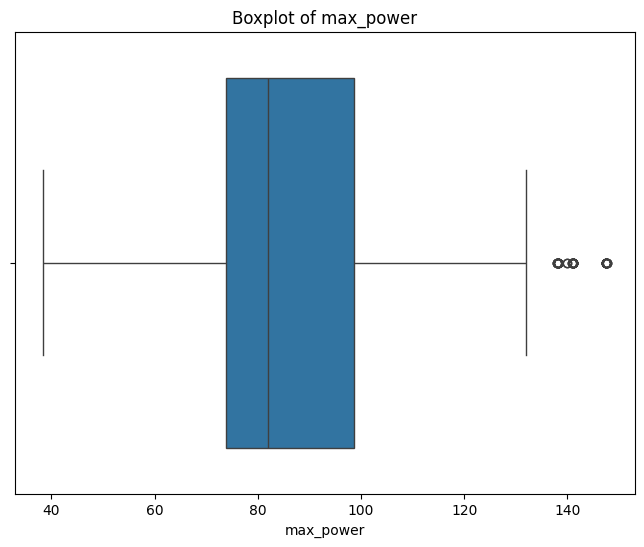

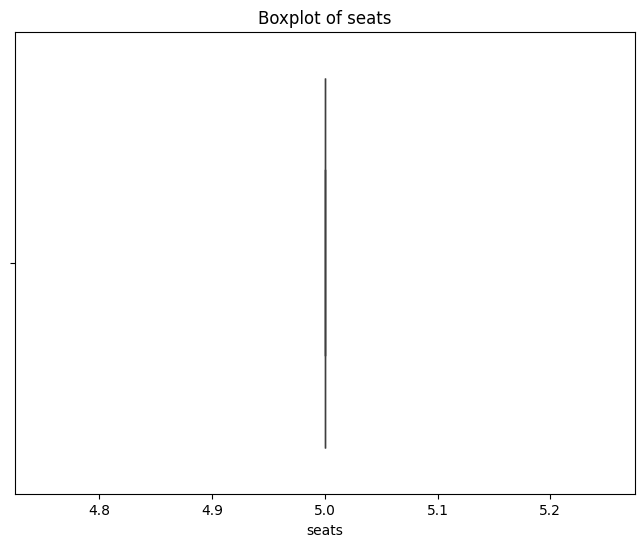

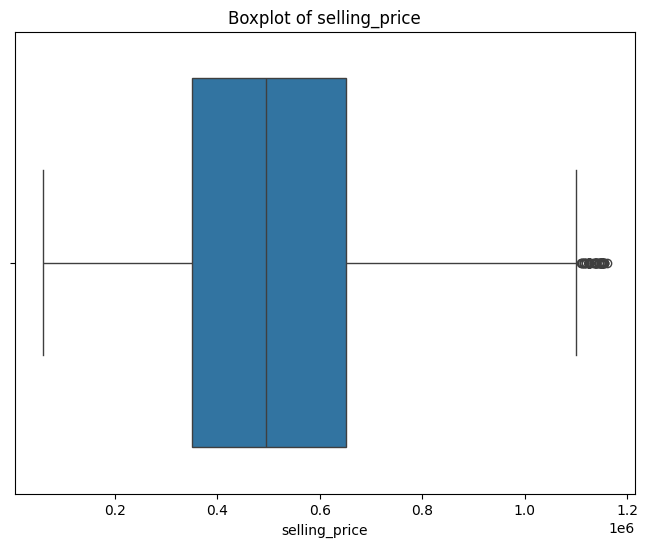

In [431]:
### Checking outliers using a graphical method

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_clean[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [432]:
# Display the number of rows removed as outliers
print(f"outliers removed from'{column}': {(df.shape[0]-df_clean.shape[0])}")

outliers removed from'selling_price': 4282


In [433]:
# Reset dataset after removing outliers
df_clean.reset_index(drop=True, inplace=True)

In [434]:
print(f"\nOriginal rows: {df.shape[0]}")
print(f"Cleaned rows: {df_clean.shape[0]}")


Original rows: 15229
Cleaned rows: 10947


In [435]:
# display the last five rows after reseting
df_clean.tail()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
10942,Honda,Amaze,6.0,28000,Diesel,Manual,25.80,1498,98.60,5,525000
10943,Renault,KWID,2.0,2700,Petrol,Manual,25.17,799,53.30,5,395000
10944,Hyundai,Grand,5.0,9229,Petrol,Manual,18.90,1197,82.00,5,545000
10945,Hyundai,i10,9.0,10723,Petrol,Manual,19.81,1086,68.05,5,250000
10946,Skoda,Rapid,6.0,67000,Diesel,Manual,21.14,1498,103.52,5,425000


In [436]:
df_clean.shape

(10947, 11)

#### 3.4 Add python comments to explain the observations.

In [437]:
### Observation

# After checking and removing outliers, the cleaned dataset has 10,947 rows.
# After removing the outliers the dataset now contains mostly typical, representative values, which can make analyses and models more reliable.
# Resetting the index just renumbers the rows so they go from 0 to 10,945, making the dataset easier to work with

### Section 4: Data Analysis

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

In [438]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [439]:
numeric_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

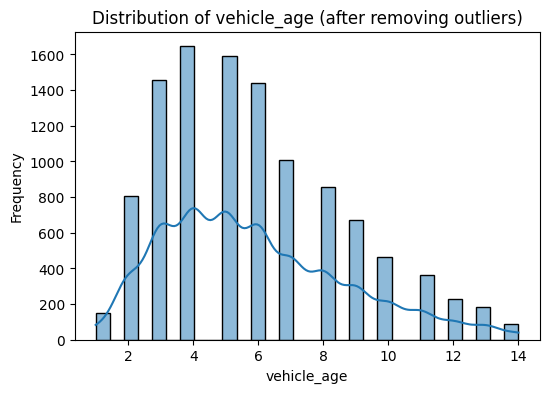

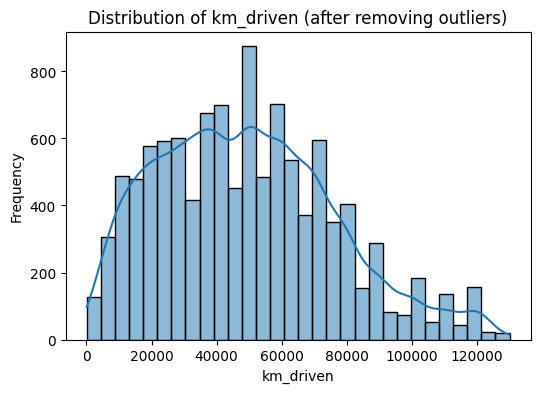

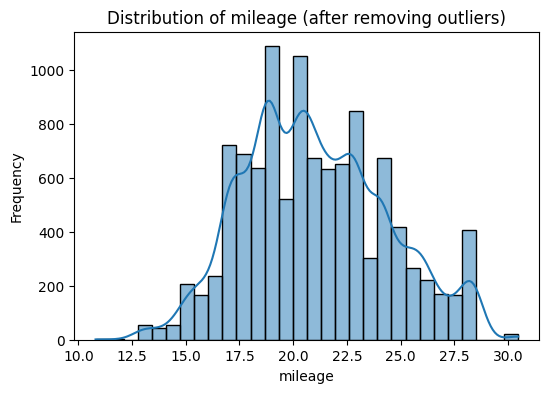

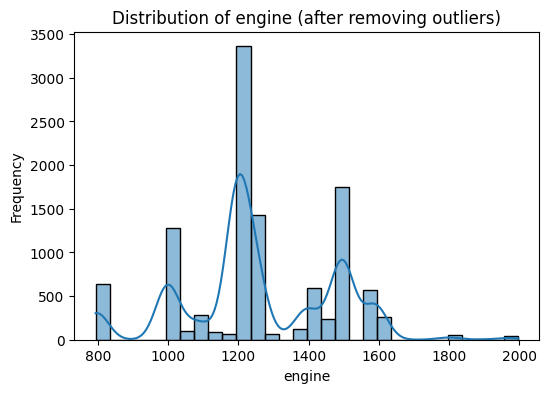

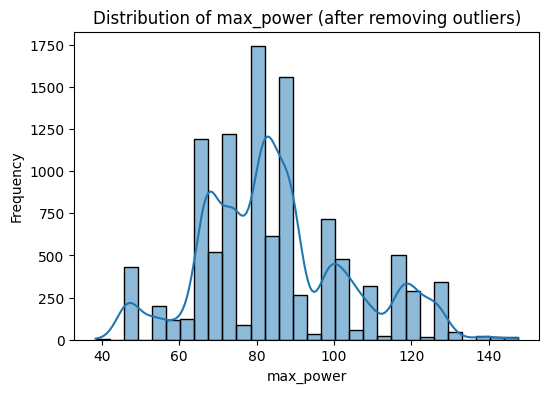

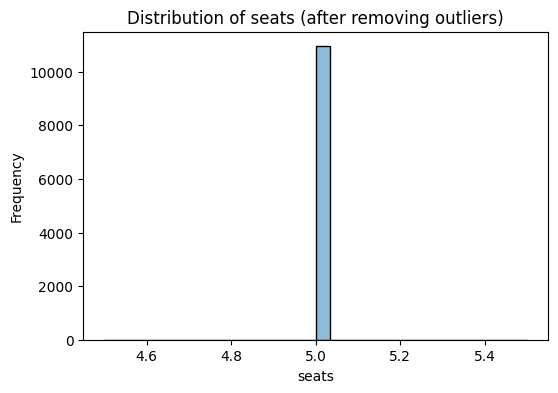

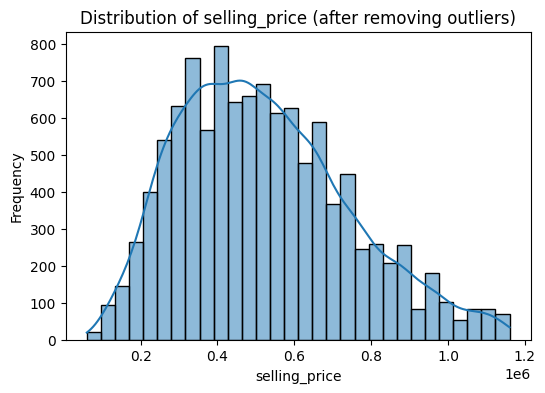

In [440]:
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_clean, x=column, bins=30, kde=True)
    plt.title(f"Distribution of {column} (after removing outliers)")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    plt.show()

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [441]:
### calculating the skewness of all numerical columns in a data frame
df_clean.skew(numeric_only=True)

,0
vehicle_age,0.682467
km_driven,0.476736
mileage,0.276329
engine,-0.011089
max_power,0.444035
seats,0.000000
selling_price,0.534018


#### 4.3 Apply appropriate standardization method wherever applicable.

In [442]:
# Standardising cleaned dataset using standardScaler method for Z score

from sklearn.preprocessing import StandardScaler

numeric_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

scaler = StandardScaler()
df_clean_scaled = df_clean.copy()
df_clean_scaled[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

print (df_clean_scaled)


         brand     model  vehicle_age  km_driven fuel_type transmission_type  \
0       Maruti      Alto     1.109700   2.598695    Petrol            Manual   
1      Hyundai     Grand    -0.306553  -1.072810    Petrol            Manual   
2      Hyundai       i20     1.817827   0.395792    Petrol            Manual   
3       Maruti      Alto     1.109700  -0.448654    Petrol            Manual   
4         Ford  Ecosport     0.047510  -0.705660    Diesel            Manual   
...        ...       ...          ...        ...       ...               ...   
10942    Honda     Amaze     0.047510  -0.779090    Diesel            Manual   
10943  Renault      KWID    -1.368743  -1.707980    Petrol            Manual   
10944  Hyundai     Grand    -0.306553  -1.468268    Petrol            Manual   
10945  Hyundai       i10     1.109700  -1.413416    Petrol            Manual   
10946    Skoda     Rapid     0.047510   0.652797    Diesel            Manual   

        mileage    engine  max_power  s

#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.

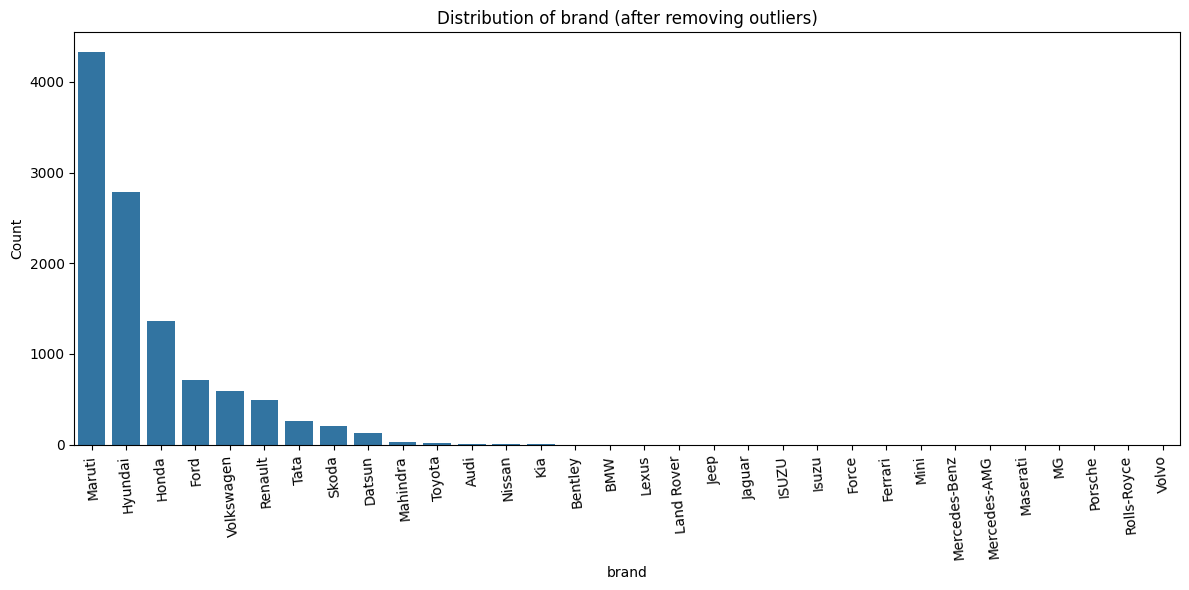

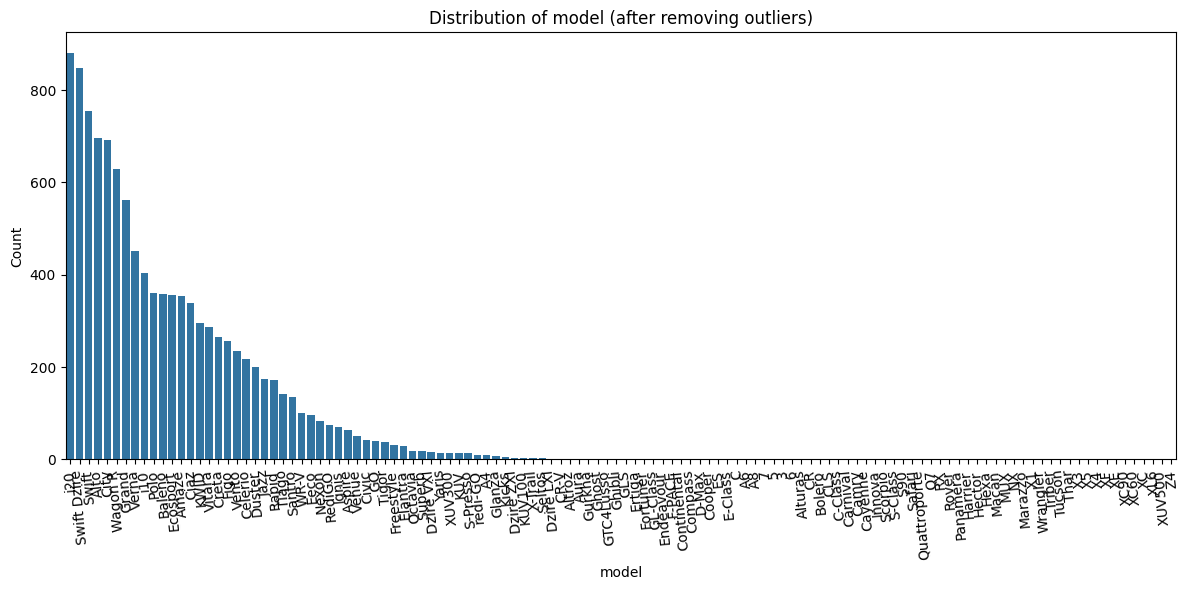

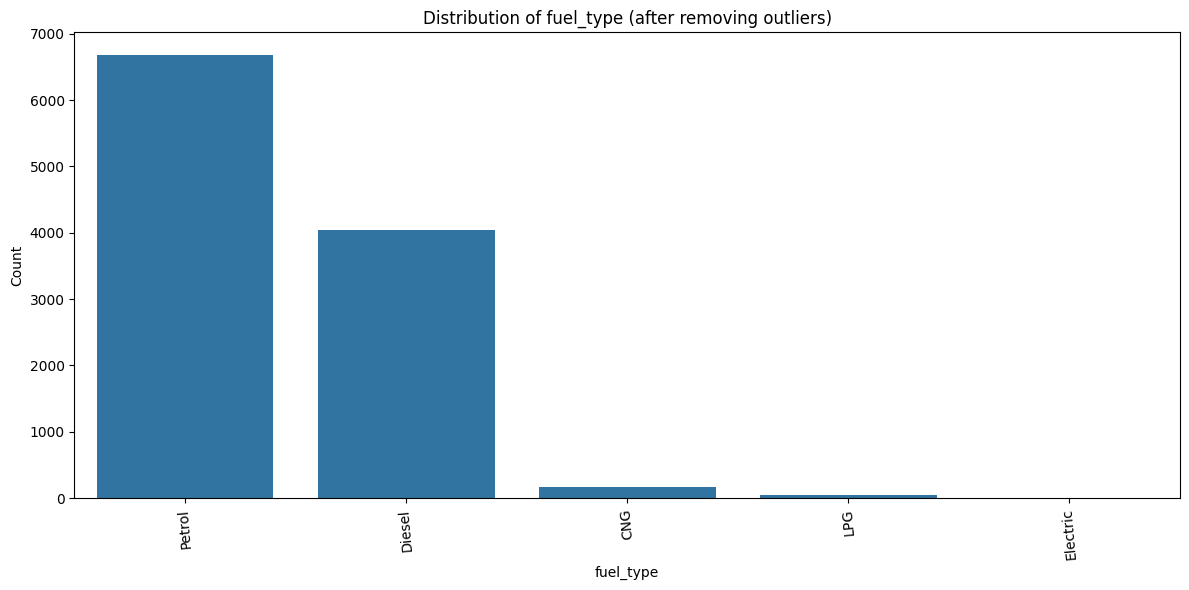

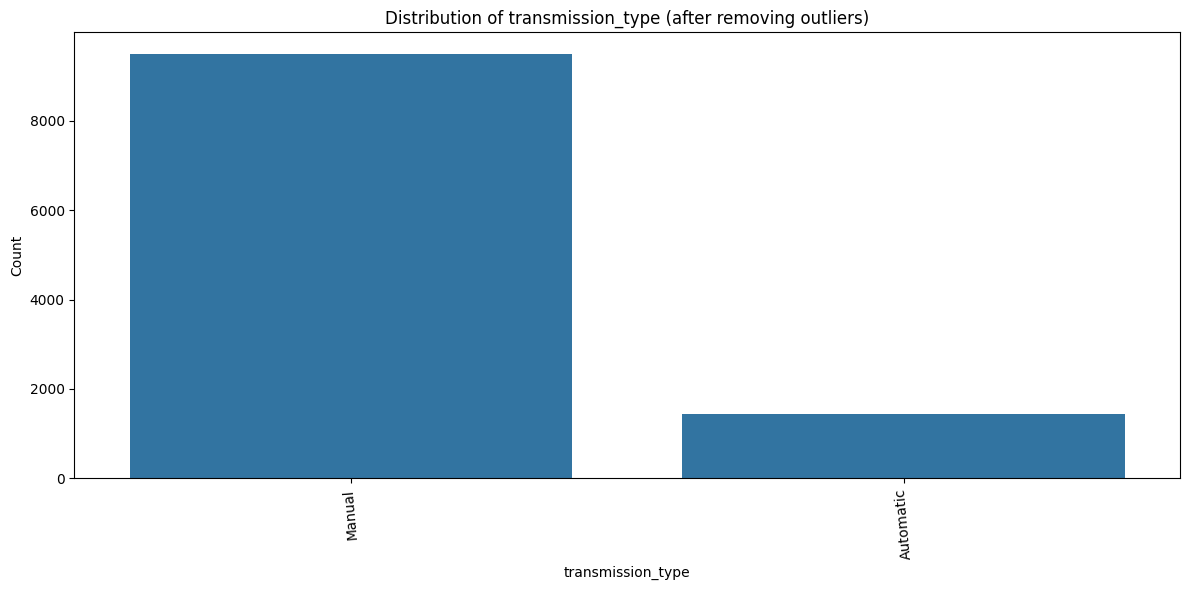

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = ['brand', 'model', 'fuel_type', 'transmission_type']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_clean, x=column, order=df_clean[column].value_counts().index)
    plt.title(f"Distribution of {column} (after removing outliers)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=95)
    plt.tight_layout()
    plt.show()

#### 4.5 Encode categorical features

In [444]:
from sklearn.preprocessing import LabelEncoder

# Copy cleaned dataframe
df_encoded = df_clean.copy()

# Categorical columns
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

encoders = {}

# encoding categorical column
for col in categorical_columns:
    le = LabelEncoder()
    le.fit(df_clean[col].unique())
    df_encoded[col] = le.transform(df_clean[col])
    encoders[col] = le

print("Encoded columns:", categorical_columns)
print(df_encoded.head())



Encoded columns: ['brand', 'model', 'fuel_type', 'transmission_type']
   brand  model  vehicle_age  km_driven  fuel_type  transmission_type  \
0      7      1          9.0     120000          3                  1   
1      4     24          5.0      20000          3                  1   
2      4     54         11.0      60000          3                  1   
3      7      1          9.0      37000          3                  1   
4      2     17          6.0      30000          1                  1   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000  


                      brand     model  vehicle_age  km_driven  fuel_type  \
brand              1.000000  0.130417    -0.049620  -0.004301  -0.039722   
model              0.130417  1.000000     0.096321   0.069907  -0.071920   
vehicle_age       -0.049620  0.096321     1.000000   0.502375   0.000115   
km_driven         -0.004301  0.069907     0.502375   1.000000  -0.368309   
fuel_type         -0.039722 -0.071920     0.000115  -0.368309   1.000000   
transmission_type -0.069409  0.056735     0.138338   0.134614  -0.138705   
mileage            0.106415 -0.062696    -0.263254   0.060235  -0.561797   
engine            -0.183049  0.003507     0.047769   0.232559  -0.400149   
max_power         -0.197089 -0.022874    -0.054102   0.089724  -0.147669   
seats                   NaN       NaN          NaN        NaN        NaN   
selling_price     -0.073970 -0.038958    -0.632507  -0.247473  -0.232284   

                   transmission_type   mileage    engine  max_power  seats  \
brand    

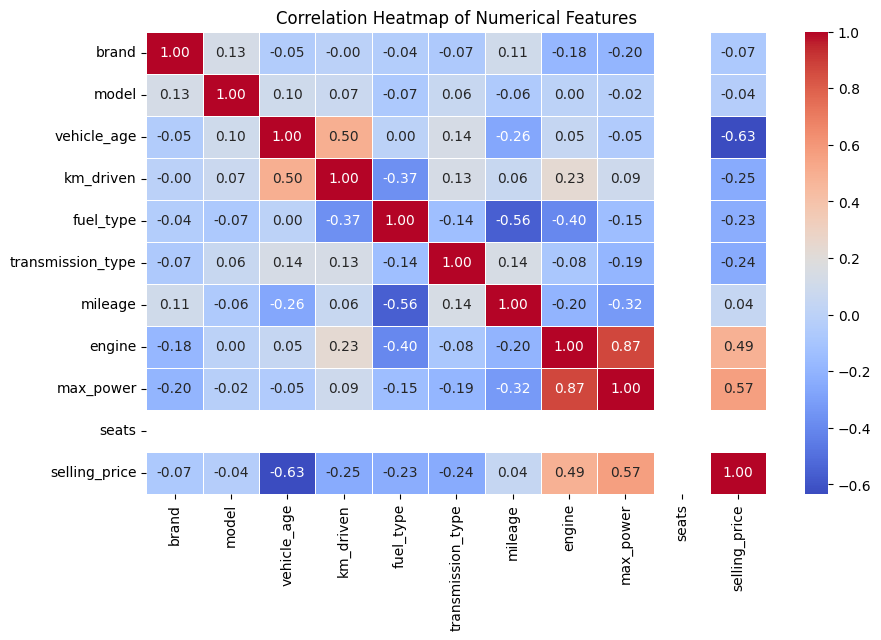

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy encoded dataset
df_en = df_encoded.copy()

# Compute correlation matrix
correlation_matrix = df_en.corr()

# Print correlation matrix
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



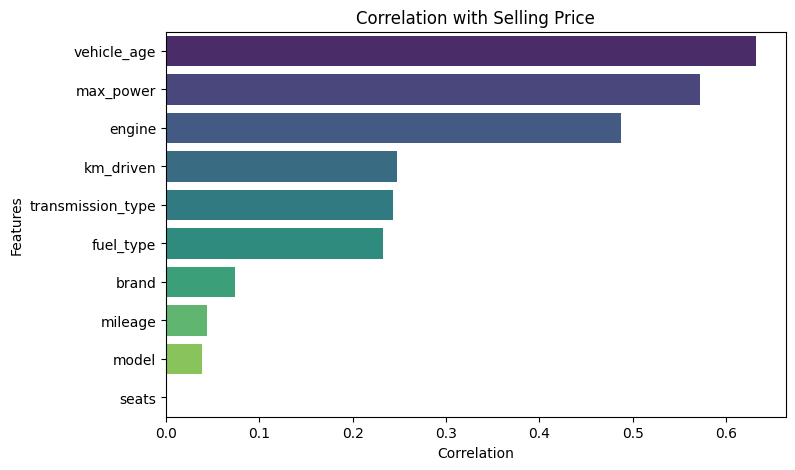

In [446]:
# compute correlation with target
df_en =df_encoded.copy()

Correlation_with_target = df_en.corr()["selling_price"].drop("selling_price")

correlation_sorted = Correlation_with_target.abs().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, hue=correlation_sorted.index, palette="viridis", legend=False)
plt.title("Correlation with Selling Price")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

#### 4.7 Provide detailed observations and conclusions.

In [447]:
## Outliers and Skewness
# After removing outliers, most of the numerical features in the dataset are fairly balanced.
# Vehicle_age and selling_price are moderately right-skewed, which means there are more younger and more affordable cars, with fewer older or very expensive ones.
# Mileage, engine, max power, and seats are roughly balanced, showing that most cars have typical values for these features.
# Km_driven is slightly right skewed, but still asymmetric
# Overall, the distributions look much cleaner and more symmetric after removing outliers, enabling more reliable analyses and modeling.

## Bivariate and Multivariate Analysis
# Cars with bigger engines and higher power usually sell at higher prices, which makes sense because they are more powerful and often considered premium.
# Older cars and cars with lower mileage (fuel efficiency) tend to sell cheaper in the dataset.
# The number of kilometers driven doesn’t seem to affect the selling price much in this dataset.
# The number of seats doesn’t strongly influence price either, as most cars have 5 seats.
# In general, the most important factors linked to car price are engine size, power, mileage, and age

### Section 5: Feature Selection

In [448]:
import pandas as pd

#### 5.1 Use correlation result for feature selection.

In [449]:
# Separate features and target
X = df_en.drop('selling_price', axis=1)
y = df_en['selling_price']

# Drop non-numeric columns (e.g., brand, model, fuel_type, transmission_type)
X_numeric = X.select_dtypes(include='number')

# Drop columns with zero variance
X_numeric = X_numeric.loc[:, X_numeric.std() != 0]

# Drop rows with NaNs
X_numeric = X_numeric.dropna()
y_aligned = y.loc[X_numeric.index]

# Recompute correlation with target
correlation = X_numeric.corrwith(y_aligned).abs()

# Feature selection using threshold
threshold = 0.10
selected_features = correlation[correlation > threshold].index.tolist()

# Final selected feature set
X_selected = X[selected_features]

print("Selected numeric features based on correlation > 0.10:")
print(selected_features)


Selected numeric features based on correlation > 0.10:
['vehicle_age', 'km_driven', 'fuel_type', 'transmission_type', 'engine', 'max_power']


#### 5.2 Select the features according to the K highest score.

In [450]:
# Separating features and target
X = df_en.drop('selling_price', axis=1)
y = df_en['selling_price']

# Keeping only numeric columns
X_numeric = X.select_dtypes(include='number')

# Dropping columns with zero variance
X_numeric = X_numeric.loc[:, X_numeric.std() != 0]

# Dropping rows with NaNs
X_numeric = X_numeric.dropna()
y_aligned = y.loc[X_numeric.index]

# Computing correlation
correlation = X_numeric.corrwith(y_aligned).abs()

# Selecting top K features
K = 15
khighest_score = correlation.sort_values(ascending=False).head(K).index.tolist()
X_selected = X_numeric[khighest_score]

print("Top", K, "features based on correlation:", khighest_score)


Top 15 features based on correlation: ['vehicle_age', 'max_power', 'engine', 'km_driven', 'transmission_type', 'fuel_type', 'brand', 'mileage', 'model']


In [451]:
# Sorting features per relationship with the target (highest to lowest score)
khighest_score1 = correlation.sort_values(ascending=False)

khighest_score1

,0
vehicle_age,0.632507
max_power,0.572631
engine,0.487821
km_driven,0.247473
transmission_type,0.243697
fuel_type,0.232284
brand,0.073970
mileage,0.044394
model,0.038958


#### 5.3 Provide detailed insights about the selected features.

In [452]:
## max_power
# has a strong positive relationship with the selling_price.
# Cars with higher power usually cost more because they perform better and are often seen as luxury.
# It’s one of the most important features for predicting price.

## engine
# Engine size is moderately positively related to price.
# Bigger engines often mean higher performance and are mostly priced higher.
# It is closely related to max_power, so in some models, including both might be redundant.

## mileage
# Mileage has a moderate negative relationship with price.
#Cars that use fuel more efficiently and have been driven less tend to sell for more.
#It helps show how fuel efficiency and usage affect the car’s value.

## In general
# max_power and engine are associated with the car’s performance, while mileage shows efficiency and usage.
# Together, these features give a strong idea of what determines the selling price.
# They are very useful for building a model to predict car prices, but we need to be careful about including both max_power and engine together in models that are sensitive to similar features.


### Section 6: Model Selection and Training:

#### 6.1 Choose at least three different machine learning algorithms to train on the dataset.

In [453]:
# The dataset is about predicting the car selling price, a continous numeric target, therefore the three machince algorithms are:

#Linear regression:
        # a supervised learning algorithm used for predicting continous numeric values;
        # which models the relationship between one or more independent variables and a dependent (target) variable;
        # by fitting a straight line or a plane in higher dimension through data
        # used when the relatioship between the variables is roughly linear
        # Beacuse it looks at each feature individually, it may assume that as the engine size increases, the price also increase at the constant rate, and
        # miss more complicated patterns, like a premium brand having a higher price even if engine size is moderate.

# Decision Tree Regressor:
         # A supervised learning algorithm used for predicting continuous numerical values
         # it works by splitting the data into snaller subsets based on feature values and,
         # assign the average of the target values in each group as a predition
         # Car prices depend on combinations of factors, like mileage, brand, and transmission type, not just one feature.
         # Decision trees can automatically split the data to capture these patterns.

# Support Vector Regression (SVR)
         # Instead of finding a maximum margin hyperplane to separate the classes,
         # SVR tries to fit a line or curve within margin of tolerance that captures most os the data points
         # Some patterns in car prices are subtle and non-linear, like prices jumping only after a certain engine size.
         # SVR can model these more complex patterns using kernels.
         # It gives another perspective to see if a non-linear approach predicts prices better than linear or tree-based model
         # SVR works best when all features are on a similar scale
         # dataset has features with very different ranges:
         # Example: km_driven can be up to thousands, while vehicle_age 0–14 years
# Random forest Regressor:
        # Handles non linear relationships-it is built from multiple decision tree allowing it to capture complex non linear relationships
        # It trains trees on a random subsetof the data and features
        # The model is more robust and less prone to overfitting than a single decision tree
        # The final prediction is the average of all the individdual trees
        # The model well performs well even without hyper tuning

#### 6.2 Train the models and apply hyperparameter tunning.

In [454]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [455]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
print("Linear Regression R² score:", r2_lin)

# Decision Tree Regressor
dec_model = DecisionTreeRegressor(random_state=40)
dec_model.fit(X_train, y_train)
y_pred_dec = dec_model.predict(X_test)
r2_dec = r2_score(y_test, y_pred_dec)
print("Decision Tree R² score:", r2_dec)

# Support Vector Regressor (SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor R² score:", r2_svr)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=40, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor R² score:", r2_rf)



Linear Regression R² score: 0.7437745936520161
Decision Tree R² score: 0.8218281502984144
Support Vector Regressor R² score: -0.01776827662585334
Random Forest Regressor R² score: 0.8878487490111029


In [456]:
# Check for overfitting and or underfitting

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test, scaled=False, scaler=None):
    if scaled and scaler is not None:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics calculation
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Train RMSE: {rmse_train:.3f}, Test RMSE: {rmse_test:.3f}")
    print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")

print("Linear Regression")
evaluate_model(lin_model, X_train, y_train, X_test, y_test)

print("Decision Tree")
evaluate_model(dec_model, X_train, y_train, X_test, y_test)

print("SVR")
evaluate_model(svr_model, X_train_scaled, y_train, X_test_scaled, y_test, scaled=True, scaler=scaler)

print("Random Forest")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)


Linear Regression
Train RMSE: 115417.423, Test RMSE: 113327.437
Train R²: 0.725, Test R²: 0.744
Decision Tree
Train RMSE: 19955.643, Test RMSE: 94502.547
Train R²: 0.992, Test R²: 0.822
SVR


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Train RMSE: 221367.992, Test RMSE: 226148.409
Train R²: -0.012, Test R²: -0.020
Random Forest
Train RMSE: 33680.829, Test RMSE: 74976.650
Train R²: 0.977, Test R²: 0.888


In [457]:
# Improve performance decision tree and random forest regressor
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor(
    max_depth=8,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)
dec_model.fit(X_train, y_train)


from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=200, random_state=42)

In [458]:
print("Selected features used for training:")
print(X_selected.columns.tolist())

Selected features used for training:
['vehicle_age', 'max_power', 'engine', 'km_driven', 'transmission_type', 'fuel_type', 'brand', 'mileage', 'model']


In [459]:
# Evaluating if the decision tree and random forest regressor performance has improved

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prediction on training and testing data
y_pred_train_dec = dec_model.predict(X_train)
y_pred_test_dec = dec_model.predict(X_test)

rmse_train_dec = np.sqrt(mean_squared_error(y_train, y_pred_train_dec))
mae_train_dec = mean_absolute_error(y_train, y_pred_train_dec)
r2_train_dec = r2_score(y_train, y_pred_train_dec)

rmse_test_dec = np.sqrt(mean_squared_error(y_test, y_pred_test_dec))
mae_test_dec = mean_absolute_error(y_test, y_pred_test_dec)
r2_test_dec = r2_score(y_test, y_pred_test_dec)

# Print results
print("Decision Tree Regressor Performance:")
print(f"Train RMSE: {rmse_train_dec:.2f}, Test RMSE: {rmse_test_dec:.2f}")
print(f"Train MAE: {mae_train_dec:.2f}, Test MAE: {mae_test_dec:.2f}")
print(f"Train R²: {r2_train_dec:.3f}, Test R²: {r2_test_dec:.3f}")


# Training metrics
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("\n Random Forest Regressor (Tuned) Performance:")
print(f"Train RMSE: {rmse_train_rf:.2f}, Test RMSE: {rmse_test_rf:.2f}")
print(f"Train MAE: {mae_train_rf:.2f}, Test MAE: {mae_test_rf:.2f}")
print(f"Train R²: {r2_train_rf:.3f}, Test R²: {r2_test_rf:.3f}")


Decision Tree Regressor Performance:
Train RMSE: 79940.91, Test RMSE: 82784.51
Train MAE: 60891.34, Test MAE: 63430.93
Train R²: 0.868, Test R²: 0.863

 Random Forest Regressor (Tuned) Performance:
Train RMSE: 63546.99, Test RMSE: 70595.73
Train MAE: 48607.58, Test MAE: 54137.28
Train R²: 0.917, Test R²: 0.901


In [460]:
#  evaluate regularised models
evaluate_model(dec_model, X_train, y_train, X_test, y_test,"Decision Tree")
evaluate_model(rf_model, X_train, y_train, X_test, y_test,"Random Forest")

Train RMSE: 79940.913, Test RMSE: 82784.508
Train R²: 0.868, Test R²: 0.863
Train RMSE: 63546.992, Test RMSE: 70595.730
Train R²: 0.917, Test R²: 0.901


In [461]:
from sklearn.preprocessing import LabelEncoder

# retrieving label encoders for brand the model was trained on

le = encoders["brand"]

known_labels = le.classes_
print("Labels the encoder knows:", known_labels)


Labels the encoder knows: ['Audi' 'Datsun' 'Ford' 'Honda' 'Hyundai' 'Kia' 'Mahindra' 'Maruti'
 'Nissan' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen']


In [462]:
from sklearn.preprocessing import LabelEncoder

# retrieving label encoders for model- trainined on
le = encoders["model"]

known_labels = le.classes_
print("Labels the encoder knows:", known_labels)



Labels the encoder knows: ['A4' 'Alto' 'Altroz' 'Amaze' 'Aspire' 'Aura' 'Baleno' 'CR-V' 'Celerio'
 'Ciaz' 'City' 'Civic' 'Creta' 'Duster' 'Dzire LXI' 'Dzire VXI'
 'Dzire ZXI' 'Ecosport' 'Eeco' 'Elantra' 'Figo' 'Freestyle' 'GO' 'Glanza'
 'Grand' 'Ignis' 'Jazz' 'KUV' 'KUV100' 'KWID' 'Kicks' 'Nexon' 'Octavia'
 'Polo' 'Rapid' 'RediGO' 'S-Presso' 'Santro' 'Seltos' 'Superb' 'Swift'
 'Swift Dzire' 'Tiago' 'Tigor' 'Vento' 'Venue' 'Verna' 'Vitara' 'WR-V'
 'Wagon R' 'X-Trail' 'XUV300' 'Yaris' 'i10' 'i20' 'redi-GO']


#### 6.3 Provide detailed observations and conclusions.

In [463]:
# Linear Regression (R² ≈ 0.70)
         # model computed about 70% of the variation in car prices
         # it captures the general trend that features like engine size, max power, and mileage affect the price.
         # However, it did not fully capture more complex or non-linear relationships,
         # so its predictions are somewhat limited.
# Decision Tree Regressor (R² after regularisation: Train: 0.848, Test: 0.849)
         # Initially, the test R² 86% and train R² at 88% indicating a strong performancewith a slight overfitting
         # The is much higher than linear regression in terms of performance
         # It can handle non-linear patterns and interactions between features
         # This shows that the dataset has non-linear relationships, a simple linear model cannot capture.
# Support Vector Regressor (R² ≈ -0.02)
          # The SVR performed very poorly with a negative R² score- severe underfitting
          # A negative R² means the model is worse than simply predicting the mean price for every car
          # The SVR works well for high-dimensional data ( with hundreds or thousands of features,
          # and the car price data set is not high-dimensional, it only has about 10 features,
          # which may be the reason it performed poorly
# Random Forest Regressor (R²  after  regularisation: Train: 0.0869, Test 0.0868
          # R² for train and test data before regularisation is 0.88 and 0.86 respectively, signalling minor overfitting
          # RMSE before regularisation is Train: 75732.487, Test: 81403.804
          # RMSE after regularisation is Train: 79435.546, Test: 81560.097


### Section 7: Model Evaluation:

In [464]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#### 7.1 Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE, R square for regression).

In [465]:
# Predictions
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Computing metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"{model_name} Performance:")
    print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
    print(f"Train MAE: {mae_train:.2f}, Test MAE: {mae_test:.2f}")
    print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}\n")

# evaluate performance
evaluate_model(lin_model, X_train, y_train, X_test, y_test, "Linear Regression")
evaluate_model(dec_model, X_train, y_train, X_test, y_test, "Decision Tree")
evaluate_model(svr_model, X_train_scaled, y_train, X_test_scaled, y_test, "SVR")
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


Linear Regression Performance:
Train RMSE: 115417.42, Test RMSE: 113327.44
Train MAE: 91338.00, Test MAE: 89504.64
Train R²: 0.725, Test R²: 0.744

Decision Tree Performance:
Train RMSE: 79940.91, Test RMSE: 82784.51
Train MAE: 60891.34, Test MAE: 63430.93
Train R²: 0.868, Test R²: 0.863

SVR Performance:
Train RMSE: 221088.03, Test RMSE: 225864.73
Train MAE: 176628.15, Test MAE: 181190.10
Train R²: -0.009, Test R²: -0.018

Random Forest Performance:
Train RMSE: 63546.99, Test RMSE: 70595.73
Train MAE: 48607.58, Test MAE: 54137.28
Train R²: 0.917, Test R²: 0.901



In [466]:

print("Selected features used for training:")
print(X_selected.columns.tolist())


Selected features used for training:
['vehicle_age', 'max_power', 'engine', 'km_driven', 'transmission_type', 'fuel_type', 'brand', 'mileage', 'model']


#### 7.2 Compare the performance of the models and select the best model based on the evaluation metrics.

In [467]:
## Linear Regression
"""
R²: Train: 0.725, Test: 0.744- The model explains approximately 72% of the variation in car price dataset.
RMSE and MAE are high indicating a diviation from actual values
General trends were captured but failed to model complex relationships in the data.
"""

## Decision Tree Regressor
"""
R² ≈ 0.868 (train), 0.863 (test): the model explains about 86% of the car prices dataset.
RMSE and MAE lower than linear regression Non linear patterns well captured and generalising well.
"""

## Support Vector Regressor (SVR)
"""
R² ≈ -0.009 (train), -0.018 (test): the model does not explain the differences in prices,
and has severe symptoms of underfitting.
The SVR model may be less suited to datasets where feature interactions and categorical influences,like brand or transmission type, play a major role.
"""

## Random Forest Regressor
"""
R² ≈ 0.917 (train), 0,901 (test): the model explains approximately 91% of the of the variation in car price dataset,
with the lowest RMSE and MAE compared to the other models. It captured
 complex patterns and generalised well.
"""

'\nR² ≈ 0.917 (train), 0,901 (test): the model explains approximately 91% of the of the variation in car price dataset,\nwith the lowest RMSE and MAE compared to the other models. It captured\n complex patterns and generalised well.\n'

#### 7.3 Provide detailed comparison and analysis of the models’ performance.

In [468]:
# Linear regression:
         # Fair performance at an R² of approximately 0.70, MAE approximately 96211 and the RMSE is at 121075
         # The strength is that it is a simple interpretable baseline model
         # It struggles to predict non linear interactions well

# Decision Tree Regressor:
        #  The R² is approximately 0.84, MAE approximately 64254 and the RMSE is at 84808
        # Although is that it accurately captures non linear patterns and simple to interpret, it is prone to overfitting
        # It is less stable because its prediction comes from one tree

# SVR
       # SVR performed poorly an R² (≈ 0 or slightly negative), RMSE (≈ 226,119), indicating severe underfitting
       # The strength is that it can model non-linear patterns if tuned
       # The weakness is poor performance without hyperparameter tuning

# Random Forest Regressor
       # The Random Forest performed best overall, achieving the highest R² (≈ 0.87), the lowest RMSE (≈81,560) and MAE (≈62,232) on the test set
       # It has a slightly higher  R² score to the Decision Tree, and has the smallest predition average
       # it has lower error metrics (RMSE, MAE) because Random Forest uses multiple trees and combines their predictions,
       # it is less overfitting due to creating many trees
       # Car price data has non-linear relationships and interactions between features which are handled more effectively than a single tree




### Section 8: Model Deployment with web app:

#### 8.1: Develop an interactive web application using Streamlit.

#### 8.2 Integrate the best-performing machine learning model into the Streamlit app.

#### 8.3 Provide an interface for users to input new data and obtain predictions from the model.

In [469]:
# Creating a pickle file to save and load python data for use in vs code

# Based on accuracy, generalization and rubustness during training and testing, the Random Forest model will be deployed
import pickle
import sklearn


# Combine model and encoders into one dictionary
combined = {
    "model": rf_model,
    "encoders": encoders
}

# Save the combined dictionary as a pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(combined, f)

print("✅ model.pkl saved successfully.")


✅ model.pkl saved successfully.
